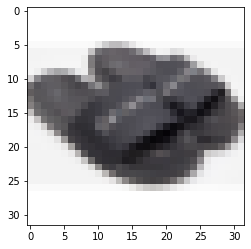

Balerinki: 6.47%
Botki: 3.45%
Creepersy: 7.02%
Czolenka: 3.83%
Domowe: 11.32%
Espadryle: 5.27%
Glany: 4.10%
Kalosze: 1.63%
Klapki: 8.62%
Kozaki: 0.00%
Mokasyny: 8.28%
Polbuty: 5.79%
Pozostale: 6.90%
Sandaly: 7.30%
Sniegowce: 3.05%
Sportowe: 6.44%
Tenisowki: 6.18%
Trekkingowe: 4.36%
biel: 3.80%
czern: 13.46%
inny-kolor: 10.42%
odcienie-brazu-i-bezu: 6.71%
odcienie-czerwieni: 2.75%
odcienie-fioletu: 8.17%
odcienie-granatowego: 13.61%
odcienie-niebieskiego: 11.62%
odcienie-pomaranczowego: 4.03%
odcienie-rozu: 0.00%
odcienie-szarosci-i-srebra: 9.14%
odcienie-zieleni: 5.95%
odcienie-zoltego-i-zlota: 1.45%
wielokolorowy: 8.89%
Domowe odcienie-granatowego


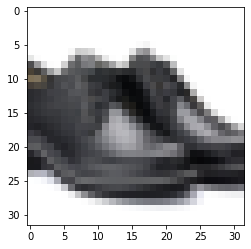

Balerinki: 11.13%
Botki: 10.93%
Creepersy: 1.87%
Czolenka: 16.84%
Domowe: 0.63%
Espadryle: 1.21%
Glany: 6.07%
Kalosze: 1.64%
Klapki: 0.00%
Kozaki: 2.64%
Mokasyny: 12.56%
Polbuty: 8.10%
Pozostale: 7.79%
Sandaly: 4.03%
Sniegowce: 1.48%
Sportowe: 3.63%
Tenisowki: 5.98%
Trekkingowe: 3.48%
biel: 5.27%
czern: 8.17%
inny-kolor: 9.55%
odcienie-brazu-i-bezu: 0.62%
odcienie-czerwieni: 2.27%
odcienie-fioletu: 11.20%
odcienie-granatowego: 13.46%
odcienie-niebieskiego: 14.54%
odcienie-pomaranczowego: 7.65%
odcienie-rozu: 3.07%
odcienie-szarosci-i-srebra: 5.34%
odcienie-zieleni: 7.19%
odcienie-zoltego-i-zlota: 0.00%
wielokolorowy: 11.67%
Czolenka odcienie-niebieskiego


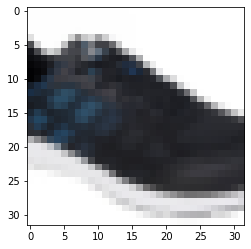

Balerinki: 6.88%
Botki: 1.42%
Creepersy: 9.72%
Czolenka: 2.11%
Domowe: 7.20%
Espadryle: 5.38%
Glany: 4.77%
Kalosze: 0.89%
Klapki: 7.30%
Kozaki: 0.00%
Mokasyny: 5.78%
Polbuty: 9.16%
Pozostale: 6.55%
Sandaly: 5.41%
Sniegowce: 2.76%
Sportowe: 9.59%
Tenisowki: 7.45%
Trekkingowe: 7.62%
biel: 4.53%
czern: 7.76%
inny-kolor: 9.83%
odcienie-brazu-i-bezu: 0.31%
odcienie-czerwieni: 1.39%
odcienie-fioletu: 12.41%
odcienie-granatowego: 14.03%
odcienie-niebieskiego: 14.15%
odcienie-pomaranczowego: 8.37%
odcienie-rozu: 3.32%
odcienie-szarosci-i-srebra: 4.68%
odcienie-zieleni: 6.95%
odcienie-zoltego-i-zlota: 0.00%
wielokolorowy: 12.26%
Creepersy odcienie-niebieskiego


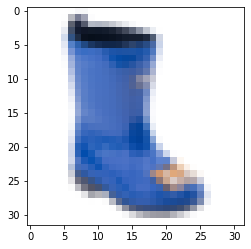

Balerinki: 3.03%
Botki: 10.12%
Creepersy: 5.18%
Czolenka: 4.62%
Domowe: 2.23%
Espadryle: 0.16%
Glany: 8.46%
Kalosze: 12.42%
Klapki: 2.96%
Kozaki: 11.97%
Mokasyny: 2.46%
Polbuty: 2.84%
Pozostale: 8.41%
Sandaly: 4.87%
Sniegowce: 11.06%
Sportowe: 0.00%
Tenisowki: 4.89%
Trekkingowe: 4.31%
biel: 8.37%
czern: 4.25%
inny-kolor: 8.15%
odcienie-brazu-i-bezu: 0.00%
odcienie-czerwieni: 1.89%
odcienie-fioletu: 9.10%
odcienie-granatowego: 7.77%
odcienie-niebieskiego: 14.16%
odcienie-pomaranczowego: 7.08%
odcienie-rozu: 7.18%
odcienie-szarosci-i-srebra: 5.30%
odcienie-zieleni: 10.11%
odcienie-zoltego-i-zlota: 3.08%
wielokolorowy: 13.57%
Kalosze odcienie-niebieskiego


In [74]:
import requests
from torch.autograd import Variable
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
import torch

import numpy as np
import os.path

import matplotlib.pyplot as plt

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

transform = transforms.Compose(
    [  transforms.Resize(32),
     transforms.Pad(10, fill=255),
     transforms.CenterCrop((32, 32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 18)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class NetBoss(nn.Module):
    def __init__(self):
        super(NetBoss, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 14)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

# loading exisiting NN's
if os.path.isfile("nn-state-dict.pth"):
    net_kind = Net()
    net_kind.load_state_dict(torch.load("nn-state-dict.pth"))
    net_kind.eval()
    

if os.path.isfile("nn-col-state-dict.pth"):
    net_col = NetBoss()
    net_col.load_state_dict(torch.load("nn-col-state-dict.pth"))
    net_col.eval()
    

url1 = "https://chillizet-static.hitraff.pl/uploads/productfeeds/images/99/dd/house-klapki-friends-czarny.jpg"
url2 = "https://e-obuwniczy.pl/pol_pl_POLBUTY-BUT-BAL-VENETTO-635-SKORA-LICOWA-CZARNY-2551_5.jpg"
url3 = "https://bhp-nord.pl/33827-thickbox_default/but-s1p-portwest-steelite-tove-ft15.jpg"
url4 = "https://www.sklepmartes.pl/174554-thickbox_default/dzieciece-kalosze-cosy-wellies-kids-2076-victoria-blue-bejo.jpg"
urls = [url1, url2, url3, url4]

# dictionary with names of shoe kinds & shoe colours
import pickle
kind = open("class-shoe.pkl", "rb")
colour = open("class-col.pkl", "rb")
shoe_kinds = pickle.load(kind)
shoe_colours = pickle.load(colour)

for url in urls:
    img = Image.open(requests.get(url, stream=True).raw)

    image_tensor = transform(img).float()
    imshow(image_tensor)
    image_tensor = image_tensor.unsqueeze_(0)
    inputi = Variable(image_tensor)

    
    # calculating the % probability of the shoe kind
    output_kind = net_kind(inputi)
    
    _, predicted_1 = torch.max(output_kind.data, 1)
    _, predicted_1m = torch.min(output_kind.data, 1)
    
    output_kind.data.add_(-output_kind.data[0][int(predicted_1m)])
    
    percentage_kind = output_kind.data.div(torch.sum(output_kind.data)) * 100
    for i in range(0, len(percentage_kind[0])):
        print(shoe_kinds[i] + ":", '%.2f' % float(percentage_kind[0][i]) + "%")
    
    # calculating the % probability of the shoe colour
    output_col = net_col(inputi)
    #print(output_col)
    _, predicted_2 = torch.max(output_col.data, 1)
    _, predicted_2m = torch.min(output_col.data, 1)
    
    # problem: colour net wrongly built on a net that outputs 18 classes instead of 14; needs fixing

    output_col.data.add_(-output_col.data[0][int(predicted_2m)])
    
    percentage_colour = output_col.data.div(torch.sum(output_col.data)) * 100
    #print(hoh)
    #print(torch.sum(hoh[:14]))
    for i in range(0, len(percentage_colour[0])):
        print(shoe_colours[i] +  ":", '%.2f' % float(percentage_colour[0][i]) + "%")
     
    # printing the most probable shoe type and colur
    print(shoe_names[int(predicted_1)], shoe_colours[int(predicted_2)])

    

